<a href="https://colab.research.google.com/github/Hetvi-624/AI-ML-Internship/blob/Titanic/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import csv
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

In [ ]:
!pip install ipywidgets

In [ ]:
df=pd.read_csv('train.csv') #read csv file
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#survived indicates person alive not not
#pclass indicates pessanger class
#sibsp indicates siblings and spouse
#parch indicates parents and children
#embarked indicates entry point of pessanger
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#age column has 177 nan values
#cabin column has 687 nan values
#embarked column has 2 nan values
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.isna().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


In [ ]:
#find missing value percentage
missing_percentage = (df.isna().sum() / len(df)) * 100
print("Percentage of missing values:")
print(missing_percentage)

Percentage of missing values:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [ ]:
# Replace values in Embarked column with fullform
df["Embarked"] = df["Embarked"].replace({"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg


In [ ]:
#remove prefix of ticket column like 'A/5' , PC
import re
def remove_ticket_prefix(ticket):
    return re.sub(r'[^0-9]', '', ticket)#Remove non-numeric characters
df['Ticket'] = df['Ticket'].astype(str).apply(remove_ticket_prefix)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,NaN,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg


In [ ]:
#remove suffix from cabin values and keep only alphabets
import re
def clean_cabin(value):
    if pd.isna(value):#keep NaN values unchanged
        return np.nan
    return re.sub(r'[^A-Za-z]', '',str(value))#remove numbers and keep only letters
df["Cabin"] = df["Cabin"].apply(clean_cabin)
df[["Cabin"]].head()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,NaN,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Cherbourg


In [ ]:
df['Fare'].value_counts()

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
35.0000,1
28.5000,1
6.2375,1


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,NaN,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Cherbourg


#Cabin

#Plot stacked bar chart for fare and cabin column

In [ ]:
fare_bins = [0, 50, 100, 150, 200, 250, 300, 550] #divide fare into interval
df['Fare_Category'] = pd.cut(df['Fare'], bins=fare_bins, right=False) #create new column fare_category and store interval values of fare in it

In [ ]:
#Group columns 'Fare_Category' and 'Cabin'
df_grouped = df.groupby(['Fare_Category', 'Cabin']).size().unstack(fill_value=0)

<ipython-input-851-cf32a0ea2946>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Fare_Category', 'Cabin']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

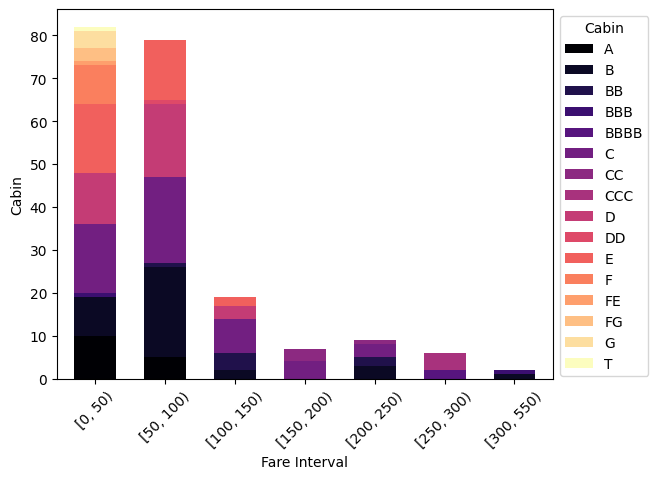

In [ ]:
#Plot the data
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap='magma', width=0.6) #plot stacked bar chart
plt.xlabel('Fare Interval')
plt.ylabel('Cabin')
plt.xticks(rotation=45) #rotate x-axis labels for better readability
plt.legend(title="Cabin", bbox_to_anchor=(1, 1), loc="best")
plt.show()

In [ ]:
df['Fare_Category']

,Fare_Category
0,"[0, 50)"
1,"[50, 100)"
2,"[0, 50)"
3,"[50, 100)"
4,"[0, 50)"
...,...
886,"[0, 50)"
887,"[0, 50)"
888,"[0, 50)"
889,"[0, 50)"


In [ ]:
df['Fare_Category'].value_counts()

,count
Fare_Category,
"[0, 50)",730
"[50, 100)",108
"[100, 150)",24
"[200, 250)",11
"[150, 200)",9
"[250, 300)",6
"[300, 550)",3


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,NaN,Southampton,"[0, 50)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg,"[50, 100)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,NaN,Southampton,"[0, 50)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton,"[50, 100)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,"[0, 50)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton,"[0, 50)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,Southampton,"[0, 50)"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,NaN,Southampton,"[0, 50)"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Cherbourg,"[0, 50)"


In [ ]:
#cabin column has 687 missing values
df['Cabin'].isna().sum()

687

#Plot missing values in cabin column




In [ ]:
#temporary replace missing values in cabin column with 'U'
df['Cabin'].fillna("U",inplace=True)
df

<ipython-input-857-161b7b7b67cc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna("U",inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,U,Southampton,"[0, 50)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg,"[50, 100)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,U,Southampton,"[0, 50)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton,"[50, 100)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,Southampton,"[0, 50)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,Southampton,"[0, 50)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,Southampton,"[0, 50)"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,U,Southampton,"[0, 50)"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Cherbourg,"[0, 50)"


In [ ]:
#create bins of fare column
fare_bins = [0, 50, 100, 150, 200, 250, 300, 550]
df['Fare_Category'] = pd.cut(df['Fare'], bins=fare_bins, right=False)

In [ ]:
# Group columns 'pclass','embarked' and 'cabin'
df_grouped = df.groupby(['Pclass','Embarked','Cabin']).size().unstack(fill_value=0)

<Figure size 1200x600 with 0 Axes>

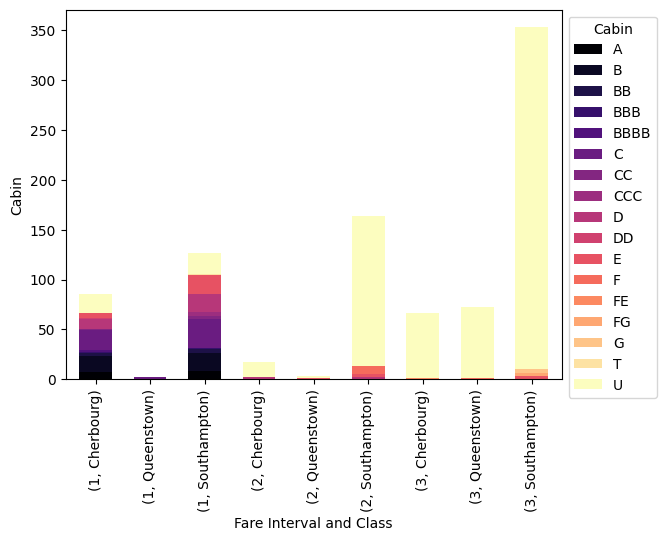

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap='magma', width=0.6)
plt.xlabel('Fare Interval and Class')
plt.ylabel('Cabin')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Cabin", bbox_to_anchor=(1, 1), loc="best") #set box as best as possible
plt.show()

In [ ]:
#find grouped median
df_grouped=df.groupby(['Pclass','Embarked','Cabin'])
grouped_median=df_grouped['Fare'].mean()
print(grouped_median)

Pclass  Embarked     Cabin
1       Cherbourg    A         38.357743
                     B         99.992975
                     BB       191.413867
                     BBB      512.329200
                     BBBB     262.375000
                     C         92.135410
                     CC       227.525000
                     D         87.808770
                     DD        63.358300
                     E         92.905840
                     U        102.376526
        Queenstown   C         90.000000
        Southampton  A         40.731763
                     B         82.142361
                     BB       120.000000
                     BBB        5.000000
                     C         74.208479
                     CC       151.550000
                     CCC      263.000000
                     D         49.719906
                     E         46.448750
                     T         35.500000
                     U         53.751986
2       Cherbourg    D        

#Fill missing values in cabin column

In [ ]:
df["Cabin"]=df["Cabin"].replace("U", pd.NA) #replace value 'U' with nan values
df['Cabin'].fillna("G",inplace=True) #fill nan values with 'G' because most of missing values has 3rd pclass , entry from southampton and fare in (0,50). after plotting missing value "G" is most frequent cabin value.
df

<ipython-input-862-d93e1659da62>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna("G",inplace=True) #fill nan values with 'G' because most of missing values has 3rd pclass , entry from southampton and fare in (0,50). after plotting missing value "G" is most frequent cabin value.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,G,Southampton,"[0, 50)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg,"[50, 100)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,G,Southampton,"[0, 50)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton,"[50, 100)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,Southampton,"[0, 50)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G,Southampton,"[0, 50)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,Southampton,"[0, 50)"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,G,Southampton,"[0, 50)"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Cherbourg,"[0, 50)"


#Embarked

#Plot stacked bar chart for fare,sex and embarked column

<ipython-input-863-691f39e0db29>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped=df.groupby(['Fare_Category','Pclass','Sex','Embarked']).size().unstack(fill_value=0) #group columns fare_category,pclass,sex and embarked


<Figure size 1200x600 with 0 Axes>

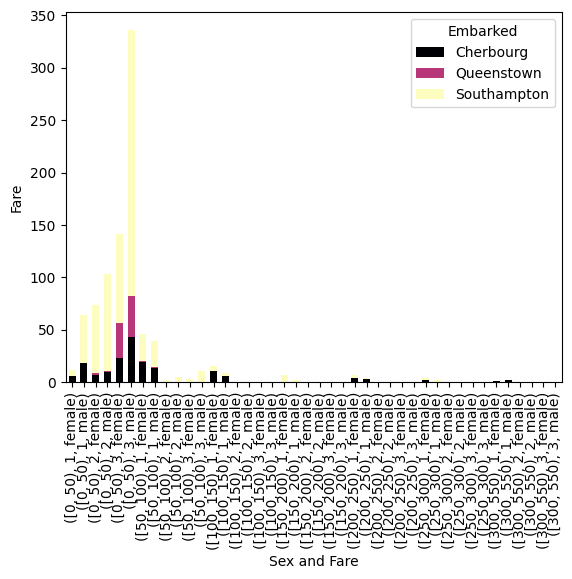

In [ ]:
fare_bins = [0, 50, 100, 150, 200, 250, 300, 550]
df['Fare_Category'] = pd.cut(df['Fare'], bins=fare_bins, right=False)
df_grouped=df.groupby(['Fare_Category','Pclass','Sex','Embarked']).size().unstack(fill_value=0) #group columns fare_category,pclass,sex and embarked
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap='magma', width=0.6)
plt.xlabel('Sex and Fare')
plt.ylabel('Fare')
#plt.xticks(rotation=45)
plt.legend(title="Embarked", bbox_to_anchor=(1, 1), loc="best")
plt.show()

#Plot missing values in embarked column

In [ ]:
#temporary missing value in embarked column replace with 'north'
df['Embarked'].fillna("North",inplace=True)
df.head(63)

<ipython-input-864-8d31e4aa6c9b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna("North",inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,G,Southampton,"[0, 50)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg,"[50, 100)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,G,Southampton,"[0, 50)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton,"[50, 100)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,Southampton,"[0, 50)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,34651,27.7500,G,Southampton,"[0, 50)"
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,2144,46.9000,G,Southampton,"[0, 50)"
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,G,Cherbourg,"[0, 50)"
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B,North,"[50, 100)"


In [ ]:
#plot missing values
fare_bins = [0, 50, 100, 150, 200, 250, 300, 550]
df['Fare_Category'] = pd.cut(df['Fare'], bins=fare_bins, right=False)

In [ ]:
df_grouped=df.groupby(['Fare_Category','Pclass','Sex','Embarked']).size().unstack(fill_value=0)

<ipython-input-866-f145d81e7449>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped=df.groupby(['Fare_Category','Pclass','Sex','Embarked']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

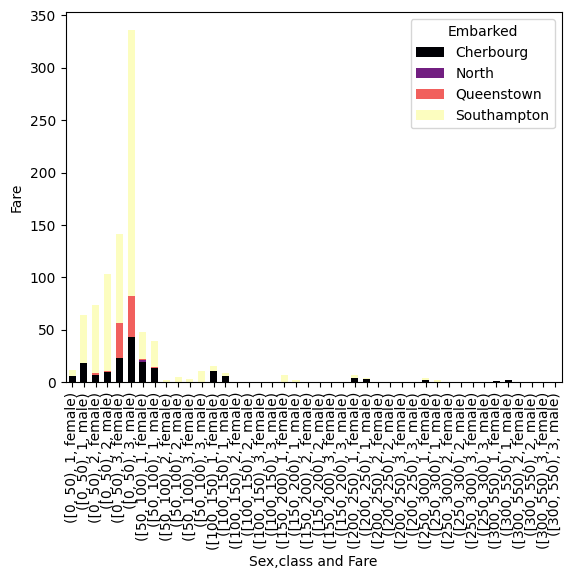

In [ ]:
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap='magma', width=0.6)
plt.xlabel('Sex,class and Fare')
plt.ylabel('Fare')
#plt.xticks(rotation=45)
plt.legend(title="Embarked", bbox_to_anchor=(1, 1), loc="best")
plt.show()

#Fill missing values in Embarked column

In [ ]:
df['Embarked']=df['Embarked'].replace('North', pd.NA) #replace 'north' with nan
df['Embarked'].fillna("Cherbourg",inplace=True) #fill missing values with cherbourg because missing values fall in cherbourge area
df

<ipython-input-868-43e1848fd8a1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna("Cherbourg",inplace=True) #fill missing values with cherbourg because missing values fall in cherbourge area


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,G,Southampton,"[0, 50)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg,"[50, 100)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,G,Southampton,"[0, 50)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton,"[50, 100)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,Southampton,"[0, 50)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G,Southampton,"[0, 50)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,Southampton,"[0, 50)"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,G,Southampton,"[0, 50)"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Cherbourg,"[0, 50)"


#Age

#Plot stacked bar chart of age,pclass and sex column

In [ ]:
age_bins = [0,0.5,1,10,20,30,40,50,60,70,80,90,100] #create bins of age column
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, right=False) #create new column age_category to store interval of age

In [ ]:
# Group columns Age_Category and sex
df_grouped = df.groupby(['Pclass','Sex','Age_Category']).size().unstack(fill_value=0) #group columns pclass,sex and age_category

<ipython-input-870-e16578d2f904>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Pclass','Sex','Age_Category']).size().unstack(fill_value=0) #group columns pclass,sex and age_category


<Figure size 1200x600 with 0 Axes>

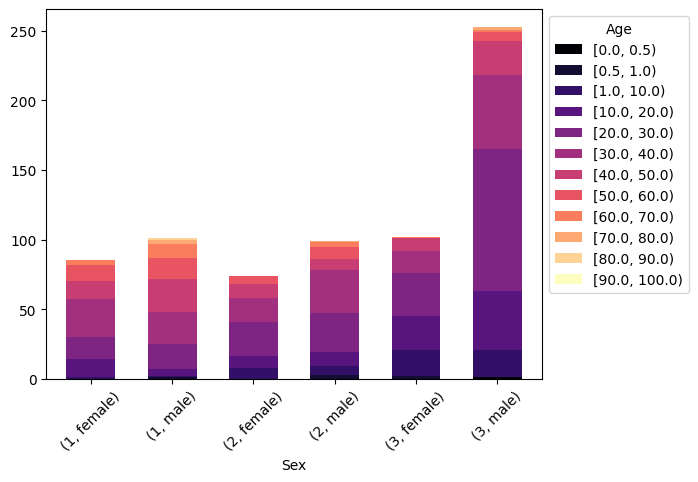

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap='magma', width=0.6)
plt.xlabel('Sex')
#plt.ylabel('Age interval')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Age", bbox_to_anchor=(1, 1), loc="best")
plt.show()

In [ ]:
#temporary fill missing value in age column with 99
df['Age'].fillna(99,inplace=True)
df

<ipython-input-872-5d035af35098>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(99,inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,G,Southampton,"[0, 50)","[20.0, 30.0)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg,"[50, 100)","[30.0, 40.0)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,G,Southampton,"[0, 50)","[20.0, 30.0)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton,"[50, 100)","[30.0, 40.0)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,Southampton,"[0, 50)","[30.0, 40.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G,Southampton,"[0, 50)","[20.0, 30.0)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,Southampton,"[0, 50)","[10.0, 20.0)"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,99.0,1,2,6607,23.4500,G,Southampton,"[0, 50)",NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Cherbourg,"[0, 50)","[20.0, 30.0)"


#Plot missing values in age column

In [ ]:
age_bins = [0,0.5,1,10,20,30,40,50,60,70,80,90,100]
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, right=False)

In [ ]:
# Group columns Age_Category and sex
df_grouped = df.groupby(['Pclass','Fare_Category','Sex','Age_Category']).size().unstack(fill_value=0) #group columns pclss,fare_category,sex and age_category

<ipython-input-874-87afe7f246af>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Pclass','Fare_Category','Sex','Age_Category']).size().unstack(fill_value=0) #group columns pclss,fare_category,sex and age_category


<Figure size 1200x600 with 0 Axes>

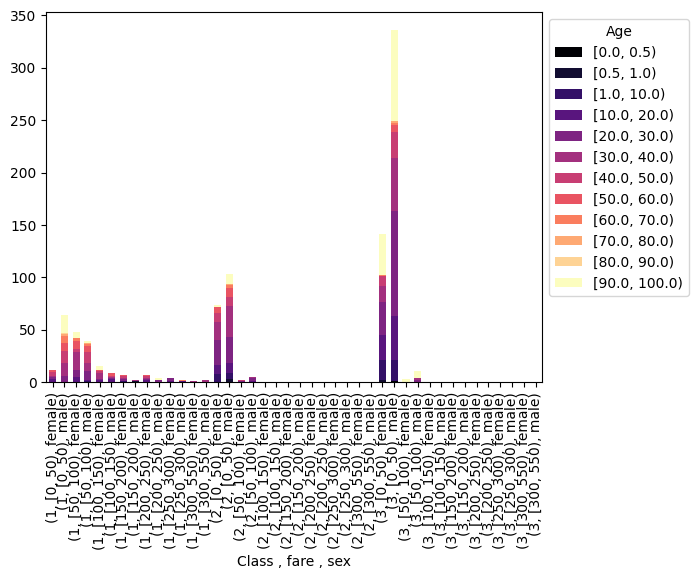

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap='magma', width=0.6)
plt.xlabel('Class , fare , sex')
#plt.ylabel('Age interval')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Age", bbox_to_anchor=(1, 1), loc="best")
plt.show()

In [ ]:
age_bins = [0,0.5,1,10,20,30,40,50,60,70,80,90,100]
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, right=False)

In [ ]:
# Group columns Age_Category and sex
df_grouped = df.groupby(['Parch','Age_Category']).size().unstack(fill_value=0) #group columns parch and age_category

<ipython-input-877-5a119269a69c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Parch','Age_Category']).size().unstack(fill_value=0) #group columns parch and age_category


<Figure size 1200x600 with 0 Axes>

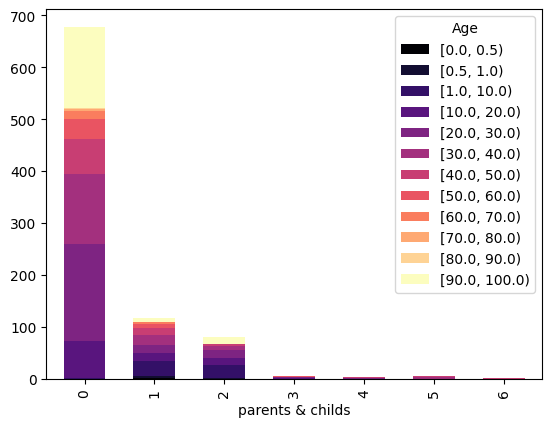

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap='magma', width=0.6)
plt.xlabel('parents & childs')
#plt.ylabel('Age interval')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Age", bbox_to_anchor=(1, 1), loc="best")
plt.show()

In [ ]:
age_bins = [0,0.5,1,10,20,30,40,50,60,70,80,90,100]
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, right=False)

In [ ]:
# Group columns Age_Category and sex
df_grouped = df.groupby(['SibSp','Age_Category']).size().unstack(fill_value=0) #group columns sibsp and age_category

<ipython-input-880-2b394a2fa157>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['SibSp','Age_Category']).size().unstack(fill_value=0) #group columns sibsp and age_category


<Figure size 1200x600 with 0 Axes>

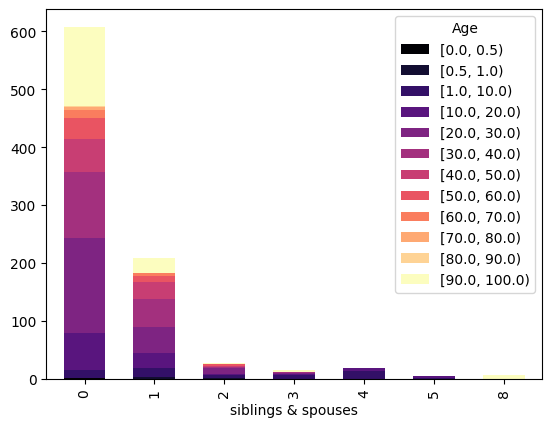

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap='magma', width=0.6)
plt.xlabel('siblings & spouses')
#plt.ylabel('Age interval')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Age", bbox_to_anchor=(1, 1), loc="best")
plt.show()

In [ ]:
#find grouped median
df_grouped=df.groupby(['Pclass','Sex','Fare_Category'])
grouped_median=df_grouped['Age'].median()
print(grouped_median)

Pclass  Sex     Fare_Category
1       female  [0, 50)          37.00
                [50, 100)        37.00
                [100, 150)       36.00
                [150, 200)       31.00
                [200, 250)       38.00
                [250, 300)       22.00
                [300, 550)       35.00
        male    [0, 50)          53.50
                [50, 100)        42.00
                [100, 150)       36.00
                [150, 200)       19.46
                [200, 250)       63.00
                [250, 300)       41.50
                [300, 550)       35.50
2       female  [0, 50)          28.50
                [50, 100)        36.00
                [100, 150)         NaN
                [150, 200)         NaN
                [200, 250)         NaN
                [250, 300)         NaN
                [300, 550)         NaN
        male    [0, 50)          31.00
                [50, 100)        21.00
                [100, 150)         NaN
                [150, 200)        

<ipython-input-882-a6332d6ae578>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped=df.groupby(['Pclass','Sex','Fare_Category'])


In [ ]:
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,G,Southampton,"[0, 50)","[20.0, 30.0)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg,"[50, 100)","[30.0, 40.0)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,G,Southampton,"[0, 50)","[20.0, 30.0)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton,"[50, 100)","[30.0, 40.0)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,Southampton,"[0, 50)","[30.0, 40.0)"
5,6,0,3,"Moran, Mr. James",male,99.0,0,0,330877,8.4583,G,Queenstown,"[0, 50)","[90.0, 100.0)"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,Southampton,"[50, 100)","[50.0, 60.0)"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,G,Southampton,"[0, 50)","[1.0, 10.0)"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,G,Southampton,"[0, 50)","[20.0, 30.0)"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G,Cherbourg,"[0, 50)","[10.0, 20.0)"


#Fill missing values in age column

In [ ]:
df["Age"]=df["Age"].replace(99, pd.NA) #replace 99 with nan
df.loc[(df["Age"].isnull())&(df["Sex"]=="male"),"Age"]=30.0 #fill null value in age which has sex=male with 30 because missing values in 4 columns has group median 30
df.loc[(df["Age"].isnull())&(df["Sex"]=="female"),"Age"]=27.0 #fill null value in age which has sex=female with 27 because missing values in 4 columns has group median 27
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,G,Southampton,"[0, 50)","[20.0, 30.0)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg,"[50, 100)","[30.0, 40.0)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,G,Southampton,"[0, 50)","[20.0, 30.0)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton,"[50, 100)","[30.0, 40.0)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,Southampton,"[0, 50)","[30.0, 40.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G,Southampton,"[0, 50)","[20.0, 30.0)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,Southampton,"[0, 50)","[10.0, 20.0)"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,6607,23.4500,G,Southampton,"[0, 50)","[90.0, 100.0)"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Cherbourg,"[0, 50)","[20.0, 30.0)"


#Interactive graph

In [ ]:
data=({'age category':df['Age_Category'],'pclass':df['Pclass'],'sex':df['Sex'],'fare category':df['Fare_Category'],'cabin':df['Cabin'],'embarked':df['Embarked']})
data

{'age category': 0       [20.0, 30.0)
 1       [30.0, 40.0)
 2       [20.0, 30.0)
 3       [30.0, 40.0)
 4       [30.0, 40.0)
            ...      
 886     [20.0, 30.0)
 887     [10.0, 20.0)
 888    [90.0, 100.0)
 889     [20.0, 30.0)
 890     [30.0, 40.0)
 Name: Age_Category, Length: 891, dtype: category
 Categories (12, interval[float64, left]): [[0.0, 0.5) < [0.5, 1.0) < [1.0, 10.0) < [10.0, 20.0) <
                                            ... < [60.0, 70.0) < [70.0, 80.0) <
                                            [80.0, 90.0) < [90.0, 100.0)],
 'pclass': 0      3
 1      1
 2      3
 3      1
 4      3
       ..
 886    2
 887    1
 888    3
 889    1
 890    3
 Name: Pclass, Length: 891, dtype: int64,
 'sex': 0        male
 1      female
 2      female
 3      female
 4        male
         ...  
 886      male
 887    female
 888    female
 889      male
 890      male
 Name: Sex, Length: 891, dtype: object,
 'fare category': 0        [0, 50)
 1      [50, 100)
 2        [

In [ ]:
column_selector=widgets.Dropdown(options=['age category','pclass','sex','fare category','cabin','embarked'],
                                 value='age category',
                                 description='Column:')
hue_selector=widgets.Dropdown(options=['age category','pclass','sex','fare category','cabin','embarked'],
                                 value='sex',
                                 description='Hue:')

In [ ]:
def update_plot(column_choice,hue_choice):
  plt.figure(figsize=(12, 6))
  sns.countplot(x=column_choice,hue=hue_choice,data=data)
  plt.legend(title=hue_choice,bbox_to_anchor=(1, 1), loc="best")
  plt.xticks(rotation=45)
  plt.show()

widgets.interactive(update_plot,column_choice=column_selector,hue_choice=hue_selector)

interactive(children=(Dropdown(description='Column:', options=('age category', 'pclass', 'sex', 'fare category…